logistic regression training score 0.9699248120300752
logistic regression test score 0.9555555555555556
-----------------------------------------------------
svc training score 0.7142857142857143
svc test score 0.5555555555555556
-----------------------------------------------------
linear_svc training score 0.9924812030075187
linear_svc test score 0.9777777777777777
-----------------------------------------------------
k_neighbor training score 0.7894736842105263
k_neighbor test score 0.6222222222222222
-----------------------------------------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 2 features, but LogisticRegression is expecting 13 features as input.

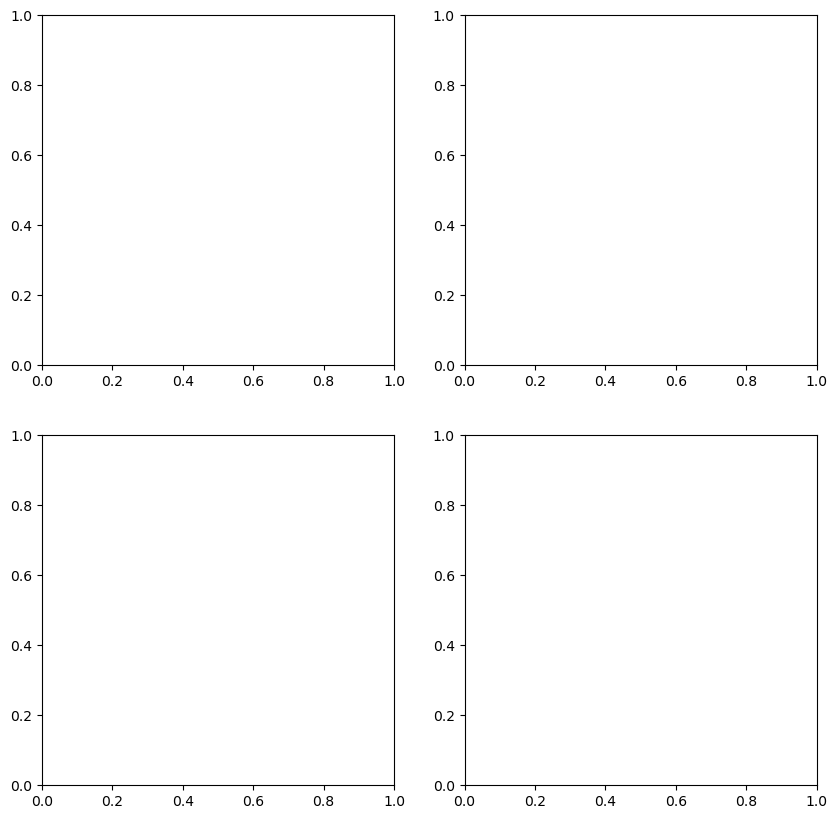

In [16]:
import sklearn.datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


# yay wine! split into training and test set 
wine = sklearn.datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("logistic regression training score", lr.score(X_train, y_train))
print("logistic regression test score", lr.score(X_test, y_test))
print("-----------------------------------------------------")

# SVC 
svc = SVC() 
svc.fit(X_train, y_train)
print("svc training score", svc.score(X_train, y_train))
print("svc test score", svc.score(X_test, y_test))
print("-----------------------------------------------------")

# Linear SVC 
linear_svc = LinearSVC() 
linear_svc.fit(X_train, y_train)
print("linear_svc training score", linear_svc.score(X_train, y_train))
print("linear_svc test score", linear_svc.score(X_test, y_test))
print("-----------------------------------------------------")

# K-Neighbor
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(X_train, y_train)
print("k_neighbor training score", k_neighbor.score(X_train, y_train))
print("k_neighbor test score", k_neighbor.score(X_test, y_test))
print("-----------------------------------------------------")

from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Assuming 'X' is your dataset and 'y' is your target labels (e.g., wine labels)

# Step 1: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Step 2: Create subplots
fig, sub = plt.subplots(2, 2, figsize=(10, 10))
models = (
    lr, 
    svc,
    linear_svc,
    k_neighbor
)
titles = ['Logistic Regression', 'SVC', 'LinearSVC', 'K-Nearest Neighbors']

# Step 3: Plot decision boundaries for each model
for clf, title, ax in zip(models, titles, sub.flatten()):
    # Create decision boundary plot
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, 
        X_reduced, 
        response_method="predict", 
        cmap=plt.cm.coolwarm, 
        alpha=0.8, 
        ax=ax,
        xlabel="Principal Component 1", 
        ylabel="Principal Component 2"
    )
    ax.set_title(title)
    
    # Scatter plot of data points
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()
plt.show()




# # Set-up 2x2 grid for plotting.
# fig, sub = plt.subplots(2, 2)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

# X0, X1 = X[:, 0], X[:, 1]

# titles = (
#     "Logistic Regression",
#     "SVC",
#     "Linear SVC",
#     "K-Neighbor",
# )

# models = (
#     lr, 
#     svc,
#     linear_svc,
#     k_neighbor
# )

# for clf, title, ax in zip(models, titles, sub.flatten()):
#     disp = DecisionBoundaryDisplay.from_estimator(
#         clf,
#         X,
#         response_method="predict",
#         cmap=plt.cm.coolwarm,
#         alpha=0.8,
#         ax=ax,
#         xlabel=wine.feature_names[0],
#         ylabel=wine.feature_names[1],
#     )
#     ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)

# plt.show()
